<a href="https://colab.research.google.com/github/xpdlaldam/PyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import torch
from torch import nn ## nn contains all of pytorch's building blocks for nerual networks
import matplotlib.pyplot as plt

torch.__version__

In [ ]:
# Create known parameters
weight = .7
bias = .3

# Create data & model
start = 0
end = 1
step = .02

## unsqueeze(dim=1)
# adds 1-D i.e., [ => [[
# we need 2-D for modeling
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
y

In [ ]:
torch.arange(start, end, step)

# Split to train & test

In [ ]:
split_ratio = int(.8 * len(X))
X_train, y_train = X[:split_ratio], y[:split_ratio]
X_test, y_test = X[split_ratio:], y[split_ratio:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Plot

In [20]:
def plot_pred(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    pred=None,
):
  """
  Plots training & test data and compares against predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Train set") # plots train set
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test set") # plots train set

  # are there predictions?
  # if pred: # this checks if pred is True
  if pred is not None: # this checks only the reference pred with None to see if they are the same
    plt.scatter(test_data, pred, c="r", s=4, label="Predictions")

  # legend
  plt.legend(prop={"size": 14})


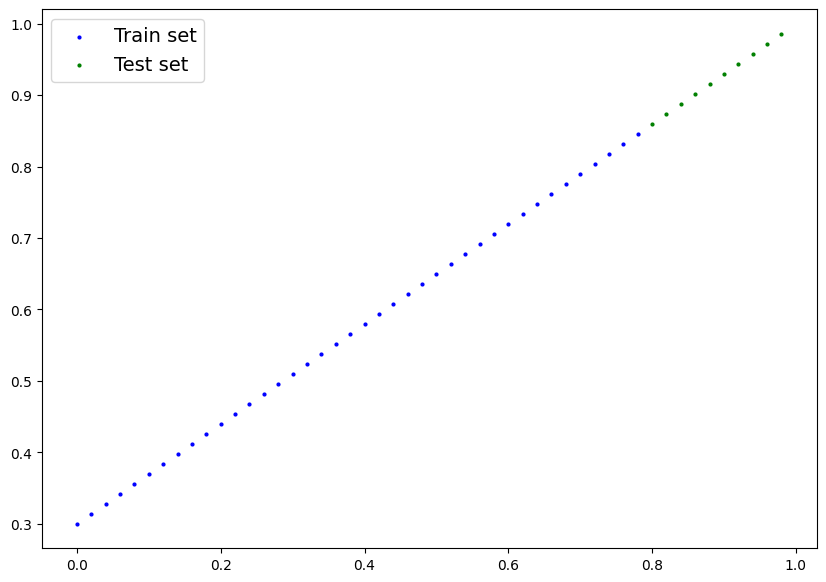

In [21]:
plot_pred()

# Build model

In [ ]:
from torch import nn

## nn.Module:
  # almost everything in pytorch inherits nn.module
  # subclasses nn.Module which contains all the building blocks for neural networks
## 1: start with a random weight
## requires_grad=True: can this parameter be updated via gradient descent?
## dtype=torch.float: pytorch loves torch.float32
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    ## Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # default: float32

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data (tensor)
    return self.weights * x + self.bias

# pytorch model building essentials

* torch.nn - contains all the buildings for computational graphs i.e., a neural network
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should override forward()
* torch.optim - this is where optimizers in pytorch lives which helps with gradient descent i.e., instead of random initialization
* def forward() - all nn.Module subclasses require you to override

In [ ]:
torch.randn(1)

In [ ]:
torch.manual_seed(42)

lin_reg = LinearRegressionModel()
list(lin_reg.parameters())

In [ ]:
# list named parameters
lin_reg.state_dict()

## Predict using `torch.inference_mode()`

In [ ]:
X_test

In [ ]:
y_test

In [27]:
## * CRUCIAL CONCEPT & TIP: Benefits of using a context manager
# Turns off/disables gradient => because we're only doing inference, we don't need to track gradient
# This context manager becomes useful when we have a much larger dataset
# The prediction will be much faster than w/o using a context manager as it disables unnecessary steps used for training
# lin_reg(X_test) leaves the gradient
with torch.inference_mode():
  y_preds = lin_reg(X_test)

# or
# ctrl + /
# with torch.no_grad():
#   y_preds = lin_reg(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

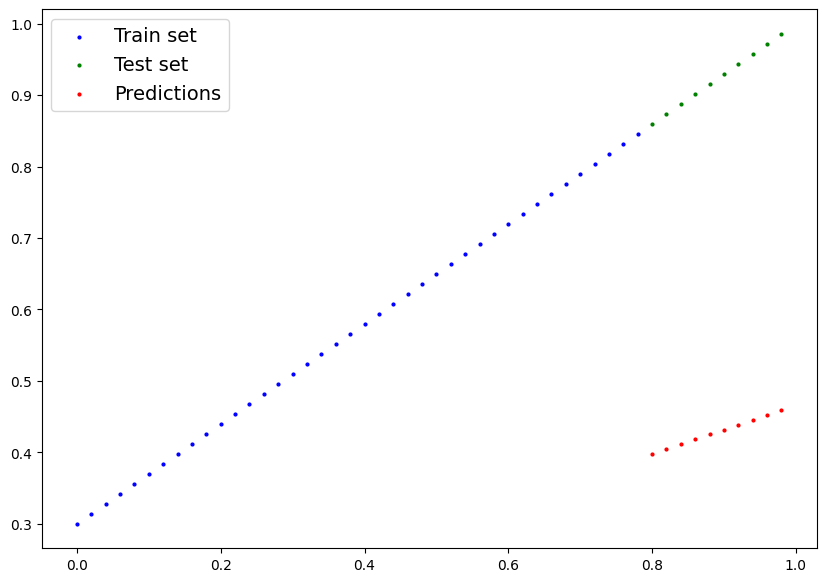

In [28]:
plot_pred(pred=y_preds)